In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#pip install citipy

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
#hold the city data
city_data = []

In [10]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1



# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nuuk
Processing Record 2 of Set 1 | ballina
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | tres arroyos
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | alakurtti
Processing Record 7 of Set 1 | ahuimanu
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | vao
Processing Record 10 of Set 1 | sinkat
City not found. Skipping...
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | latung
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | shyroke
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | fukue
Processing Record 20 of Set 1 | codrington
Processing Record 21 of Set 1 | saint augustine
Processing Record 22 of Set 1 | sola
Processing Record 23

Processing Record 39 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 40 of Set 4 | passo de camaragibe
Processing Record 41 of Set 4 | ivdel
Processing Record 42 of Set 4 | la grande
Processing Record 43 of Set 4 | hailar
Processing Record 44 of Set 4 | harnai
Processing Record 45 of Set 4 | paidha
Processing Record 46 of Set 4 | kombissiri
Processing Record 47 of Set 4 | mocuba
Processing Record 48 of Set 4 | wadhwan
City not found. Skipping...
Processing Record 49 of Set 4 | sinnamary
Processing Record 50 of Set 4 | kodiak
Processing Record 1 of Set 5 | alofi
Processing Record 2 of Set 5 | auki
Processing Record 3 of Set 5 | colares
Processing Record 4 of Set 5 | deh rawud
City not found. Skipping...
Processing Record 5 of Set 5 | bam
Processing Record 6 of Set 5 | hervey bay
Processing Record 7 of Set 5 | sikonge
Processing Record 8 of Set 5 | rocha
Processing Record 9 of Set 5 | mezen
Processing Record 10 of Set 5 | chokurdakh
Processing Record 11 of Set 5 | kungu

Processing Record 28 of Set 8 | doka
Processing Record 29 of Set 8 | broken hill
Processing Record 30 of Set 8 | san andres
Processing Record 31 of Set 8 | launceston
Processing Record 32 of Set 8 | amderma
City not found. Skipping...
Processing Record 33 of Set 8 | maceio
Processing Record 34 of Set 8 | parakou
Processing Record 35 of Set 8 | katsuura
Processing Record 36 of Set 8 | walvis bay
Processing Record 37 of Set 8 | dauphin
Processing Record 38 of Set 8 | kalmunai
Processing Record 39 of Set 8 | srednekolymsk
Processing Record 40 of Set 8 | dinar
Processing Record 41 of Set 8 | nautla
Processing Record 42 of Set 8 | dubrovnik
Processing Record 43 of Set 8 | nikko
Processing Record 44 of Set 8 | montepuez
Processing Record 45 of Set 8 | ozinki
Processing Record 46 of Set 8 | heihe
Processing Record 47 of Set 8 | hambantota
Processing Record 48 of Set 8 | pochutla
Processing Record 49 of Set 8 | broken arrow
Processing Record 50 of Set 8 | panambi
Processing Record 1 of Set 9 |

Processing Record 18 of Set 12 | gilbues
Processing Record 19 of Set 12 | manokwari
Processing Record 20 of Set 12 | kirakira
Processing Record 21 of Set 12 | sedelnikovo
City not found. Skipping...
Processing Record 22 of Set 12 | sharjah
Processing Record 23 of Set 12 | shahabad
Processing Record 24 of Set 12 | kieta
Processing Record 25 of Set 12 | ritchie
Processing Record 26 of Set 12 | pierre
Processing Record 27 of Set 12 | asayita
City not found. Skipping...
Processing Record 28 of Set 12 | manta
Processing Record 29 of Set 12 | dong hoi
Processing Record 30 of Set 12 | natchez
Processing Record 31 of Set 12 | verkhnyaya balkariya
Processing Record 32 of Set 12 | mecca
Processing Record 33 of Set 12 | jinsha
Processing Record 34 of Set 12 | soe
Processing Record 35 of Set 12 | ngaoundere
Processing Record 36 of Set 12 | kem
Processing Record 37 of Set 12 | banjar
Processing Record 38 of Set 12 | grand gaube
Processing Record 39 of Set 12 | nantucket
Processing Record 40 of Set 

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nuuk,64.1835,-51.7216,22.87,79,96,15.99,GL,2022-11-18 18:08:51
1,Ballina,-28.8667,153.5667,56.01,99,86,2.01,AU,2022-11-18 18:10:01
2,Barrow,71.2906,-156.7887,33.82,80,40,26.46,US,2022-11-18 18:15:05
3,Tres Arroyos,-38.3739,-60.2798,78.53,42,100,8.57,AR,2022-11-18 18:18:05
4,Rikitea,-23.1203,-134.9692,71.31,69,50,13.15,PF,2022-11-18 18:11:00
5,Alakurtti,66.9672,30.3491,26.96,95,97,0.31,RU,2022-11-18 18:18:06
6,Ahuimanu,21.4447,-157.8378,79.79,85,40,3.44,US,2022-11-18 18:18:06
7,Mataura,-46.1927,168.8643,58.48,88,100,8.16,NZ,2022-11-18 18:11:00
8,Vao,-22.6667,167.4833,72.57,73,100,12.15,NC,2022-11-18 18:18:06
9,Arraial Do Cabo,-22.9661,-42.0278,78.76,57,0,14.97,BR,2022-11-18 18:18:07


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nuuk,GL,2022-11-18 18:08:51,64.1835,-51.7216,22.87,79,96,15.99
1,Ballina,AU,2022-11-18 18:10:01,-28.8667,153.5667,56.01,99,86,2.01
2,Barrow,US,2022-11-18 18:15:05,71.2906,-156.7887,33.82,80,40,26.46
3,Tres Arroyos,AR,2022-11-18 18:18:05,-38.3739,-60.2798,78.53,42,100,8.57
4,Rikitea,PF,2022-11-18 18:11:00,-23.1203,-134.9692,71.31,69,50,13.15
5,Alakurtti,RU,2022-11-18 18:18:06,66.9672,30.3491,26.96,95,97,0.31
6,Ahuimanu,US,2022-11-18 18:18:06,21.4447,-157.8378,79.79,85,40,3.44
7,Mataura,NZ,2022-11-18 18:11:00,-46.1927,168.8643,58.48,88,100,8.16
8,Vao,NC,2022-11-18 18:18:06,-22.6667,167.4833,72.57,73,100,12.15
9,Arraial Do Cabo,BR,2022-11-18 18:18:07,-22.9661,-42.0278,78.76,57,0,14.97


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

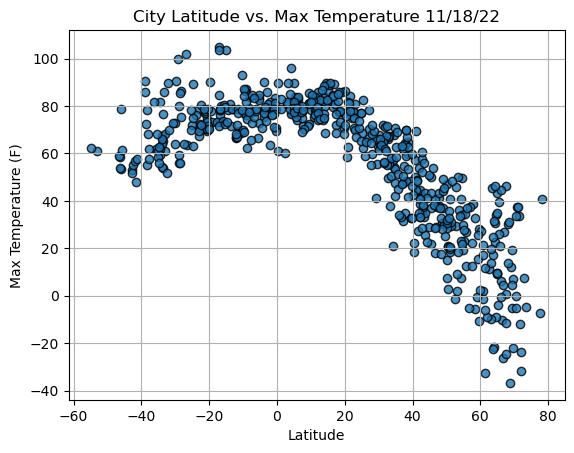

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

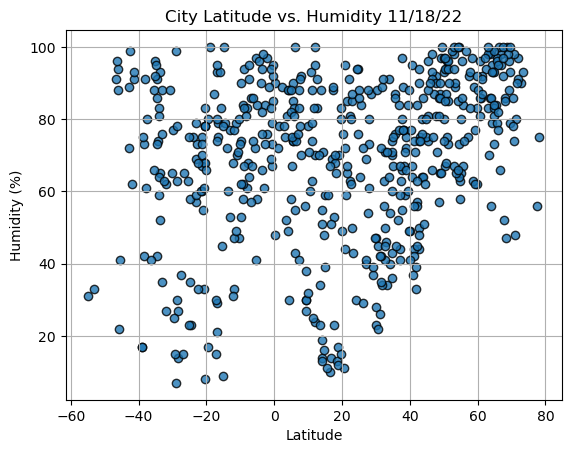

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

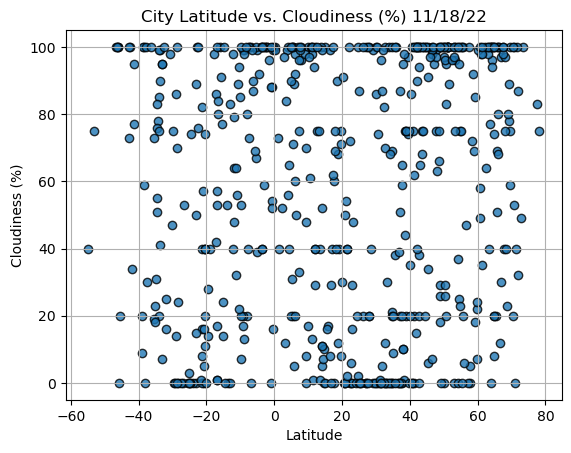

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

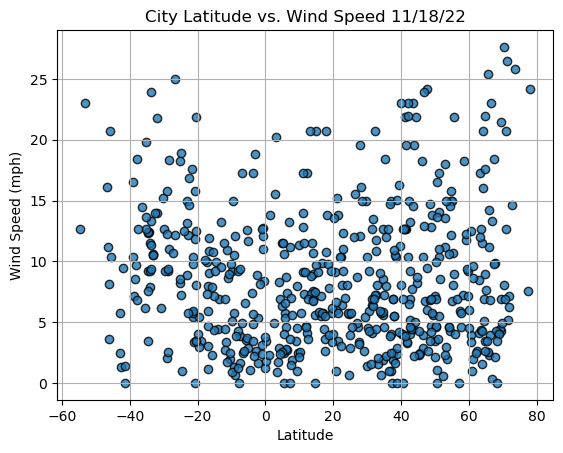

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()